In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.feature_selection import SequentialFeatureSelector




from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import *

# Data import

In [2]:
df_raw = pd.read_csv('hw3_labeled.csv')
display(df_raw.head())
print(df_raw.info())
print(df_raw.shape)

,ID,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_ImStucc,Exterior_CBlock,Exterior_Stucco,Exterior_BrkComm,Exterior_WdShing,HasAlley,HasMiscFeature
0,84b6b8402,1-STORY 1946+,RL,85,8500,0,Lvl,Inside,0,NAmes,...,1,0,0,0,0,0,0,0,0,0
1,a2f423bff,2-STORY 1946+,FV,65,8125,0,Lvl,Inside,0,Somerst,...,0,0,0,0,0,0,0,0,0,0
2,065cc61df,2-STORY 1946+,RL,89,11645,1,Lvl,Corner,0,CollgCr,...,0,0,0,0,0,0,0,0,0,0
3,7c8d49f4d,2-STORY PUD 1946+,FV,24,2572,0,Lvl,FR2,0,Somerst,...,0,1,0,0,0,0,0,0,0,0
4,086b67ab7,2-STORY 1945-,RL,79,9480,0,Lvl,Inside,0,NAmes,...,0,1,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 98 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                700 non-null    object
 1   MSSubClass        700 non-null    object
 2   MSZoning          700 non-null    object
 3   LotFrontage       700 non-null    int64 
 4   LotArea           700 non-null    int64 
 5   LotShape          700 non-null    int64 
 6   LandContour       700 non-null    object
 7   LotConfig         700 non-null    object
 8   LandSlope         700 non-null    int64 
 9   Neighborhood      700 non-null    object
 10  BldgType          700 non-null    object
 11  HouseStyle        700 non-null    object
 12  OverallQual       700 non-null    int64 
 13  OverallCond       700 non-null    int64 
 14  YearBuilt         700 non-null    int64 
 15  YearRemodAdd      700 non-null    int64 
 16  RoofStyle         700 non-null    object
 17  RoofMatl        

As we can see there are a number of categorical variables that need to be cleaned up 

# Data Cleaning

In [3]:
# Checking the number of unique variabels to dummify 
features = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType',
            'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'Foundation', 'Heating',
            'GarageType', 'SaleType', 'SaleCondition']

#----------------------------------------------------------------------------------------------------
df = df_raw.copy()

for i in features:
    print(i,':',len(df[i].unique()))

MSSubClass : 15
MSZoning : 5
LandContour : 4
LotConfig : 5
Neighborhood : 25
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 6
MasVnrType : 4
Foundation : 6
Heating : 4
GarageType : 1
SaleType : 8
SaleCondition : 6


In [4]:
# Creating dummies for categorical variables 
df = df_raw.copy()
df = pd.get_dummies(df, columns=features)

#----------------------------------------------------------------------------------------------------
# Changing months to number 
def monthToNum(shortMonth):
    return {
            'Jan': 1,
            'Feb': 2,
            'Mar': 3,
            'Apr': 4,
            'May': 5,
            'June': 6,
            'July': 7,
            'Aug': 8,
            'Sept': 9, 
            'Oct': 10,
            'Nov': 11,
            'Dec': 12
    }[shortMonth]

df['MoSold'] = df['MoSold'].apply(monthToNum)

#----------------------------------------------------------------------------------------------------
# Dropping the id column 
df = df.drop('ID', axis=1)


df

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,85,8500,0,0,5,3,1961,1961,203,3,...,0,0,0,1,1,0,0,0,0,0
1,65,8125,0,0,7,5,2005,2006,0,4,...,0,0,1,0,0,0,0,0,0,1
2,89,11645,1,0,7,5,2004,2004,0,4,...,0,0,0,1,0,0,0,0,1,0
3,24,2572,0,0,7,5,1999,1999,0,4,...,0,0,0,1,0,0,0,0,1,0
4,79,9480,0,0,5,7,1942,1995,224,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,71,8197,0,0,6,5,1977,1977,148,3,...,0,0,0,1,0,0,0,0,1,0
696,65,8775,0,0,5,5,1994,1994,0,3,...,0,0,0,1,0,0,0,0,1,0
697,60,6000,0,1,4,4,1953,1953,0,2,...,0,0,0,1,0,0,0,0,1,0
698,69,9588,1,0,8,5,2007,2007,270,4,...,0,0,1,0,0,0,0,0,0,1


After dummyfying all the categorical vairables, we now have 190 columns. From here on out, we must be careful of overfitting, as the number fo covariates that we have are is now almost 30% relative to the total amount of data that we have.

### Functions to make working easier

In [5]:
def data_generation(df, features):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    y = df_temp['SalePrice']
    X = df_temp.drop('SalePrice', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    return([X_train, X_test, y_train, y_test])

This function helps to do the train test split to ensure that each time i run the model, the test and train data is correct

# Data exploration using simple linear models

Since this question is about the prediction of the value of the property give some factors, I believe that this could be solved using a linear model. So in this section I will take a peek at the performance of relatively simple linear models to benchmark against the more complex non linear models later. 

In [6]:
features = df.columns
results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features)

temp = []
models = []
models.append(('OLS', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))

#--------------------------------------------------------------------------------------------------
# Checking the performance of Linear models 

for name, model in models:
    mdl = Pipeline(steps=[("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='neg_mean_squared_error',
                                 n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean())])

# Create dataframe and sort by the MSE performance 
mdl_performance = pd.DataFrame(temp, columns=['model', 'MSE'])
mdl_performance = mdl_performance.sort_values('MSE', ascending=True)
mdl_performance

,model,MSE
2,Ridge,1.627361e+09
1,Lasso,2.032845e+09
0,OLS,2.981228e+31


As we can see, the OLS performance is very bad. This is because the number of covariates is very large relative to the size of the training data (almost 30%). This means that there is a significant risk of overfitting. Thus OLS should not be used. 

As we can see, ridge regression performs the best. However, I believe that with some tuning, Lasso could be better due to its ability to provide sparse solutions. This not only will help to improve model interpretability, but also it will help wtih model complexity which is ultimately done to combat overfitting, which is a major concern as the number of covariates is very large.

# Feature selection using Random Forest 

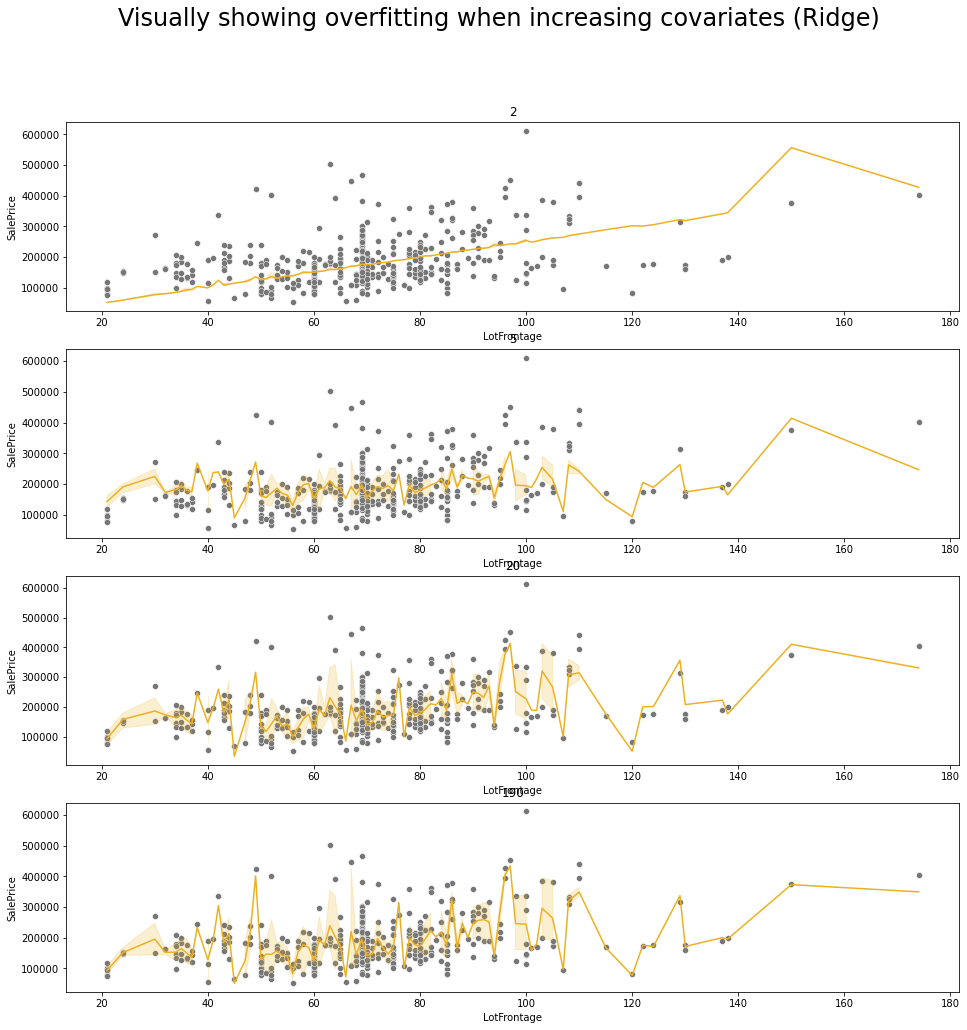

In [7]:
testing = [2, 5, 20, 190]
features = df.columns

fig, axs = plt.subplots(nrows=4, figsize=(16,16))
counter = 0


for i in testing:
    features = df.columns
    features = features.drop('SalePrice')
    slicing = list(features[:i])
    slicing.append('SalePrice')

    X_train, X_test, y_train, y_test = data_generation(df, slicing)
    
    #-------------------------------------------------------------------------------------------
    temp_df = pd.DataFrame(X_train)
    temp_df['SalePrice'] = y_train
    
    mdl = Ridge(fit_intercept = False)
    temp_x = temp_df.drop('SalePrice', axis = 1)
    temp_y = temp_df['SalePrice']
    
    mdl.fit(temp_x, temp_y)
    preds = mdl.predict(temp_x)
    
    sns.scatterplot(x = temp_x.iloc[:,0], y = temp_y, color='#767676', ax=axs[counter])
    sns.lineplot(x = temp_x.iloc[:,0], y = preds, color='#edb021', ax=axs[counter])
    
    counter += 1

#-------------------------------------------------------------------------------------------
axs[0].title.set_text('2')
axs[1].title.set_text('5')
axs[2].title.set_text('20')
axs[3].title.set_text('190')

plt.suptitle('Visually showing overfitting when increasing covariates (Ridge)', fontsize = 24)

plt.show()

These graphs above try to show graphically how the model will begin to overfit as the number of covariates increasees. This is ultimately why feature selection and regularisation is necessary.

In [8]:
features = df.columns

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features)

#--------------------------------------------------------------------------------------------------
# Sequential feature selection 
lr = Pipeline(steps=[("scaler", StandardScaler()),
                     ("mdl", Lasso())])

sfs = SequentialFeatureSelector(lr, n_jobs=-1)
sfs.fit(X_train, y_train)

feature_selection_features = list(X_train.columns[sfs.get_support()])
feature_selection_features.append('SalePrice')

print(f'Features selected: {feature_selection_features}')
print('Total  features            : ',len(df.columns))
print('Number of features selected: ',len(feature_selection_features))

Features selected: ['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'Electrical', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Condition_Feedr', 'Condition_RRNe', 'Condition_PosN', 'Condition_RRAe', 'Condition_Artery', 'Exterior_Wd Sdng', 'Exterior_BrkFace', 'Exterior_HdBoard', 'Exterior_MetalSd', 'Exterior_CBlock', 'Exterior_Stucco', 'Exterior_BrkComm', 'HasAlley', 'HasMiscFeature', 'MSSubClass_1-1/2 STORY FIN', 'MSSubClass_1-1/2 STORY UNF', 'MSSubClass_1-STORY 1946+', 'MSSubClass_1-STORY PUD 1946+', 'MSSubClass_1-STORY W/ ATTIC', 'MSSubClass_DUPLEX', 'MSSubClass_SPLIT FOYER', 'MSZoning_FV', 'MSZoning_RM', 'LandContour_Low', 'LotConfig_CulDSac', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_B

This is the features that the sequential feature selector has chosen to be important. I have chosen to do it forwards because of the large number of covariates, which would increase the already significant computation time. 
<br>
<br>
I have chosen Lasso due to its ability to give sparse solutions. Furthermore, it is also relatievly faster to run. This code already takes a very long time to run so this helps computationally. 

In [9]:
# Doing feature importance using RandomForestClassifier
features = df.columns

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features)

#--------------------------------------------------------------------------------------------------
'''Feature importances are provided by the fitted attribute feature_importances_ and they
are computed as the mean and standard deviation of accumulation of the impurity decrease 
within each tree.'''

forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Creating dataframe then sorting the features by importance
feature_names = X_train.columns
forest_importances = pd.DataFrame(importances, index=feature_names)
forest_importances = forest_importances.reset_index()
forest_importances = forest_importances.sort_values(0, ascending=False)
forest_importances

,index,0
4,OverallQual,0.541604
26,GrLivArea,0.163976
23,1stFlrSF,0.035224
15,BsmtFinSF1,0.032566
19,TotalBsmtSF,0.032383
...,...,...
111,Neighborhood_Blueste,0.000000
80,HasMiscFeature,0.000000
174,GarageType_Attchd,0.000000
61,Condition_RRAe,0.000000


I have further done feature importances on the data set, using random forest regressor as a sanity check to see if it agrees with the features chosen by the sequential feature selector. 
<br>
<br>
As we can see, both the feature importance and the sequential seleciton have chosen similar features. Going forward, I will be using the features selected by the sequential feature selector to reduce the number of features, so that there is less chance of overfitting and to improve the computation time of the models.

# Performance of models 

In [10]:
features = df.columns
results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)


#--------------------------------------------------------------------------------------------------

temp = []
models = []
models.append(('OLS', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))

models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))

models.append(('K Neigbor Regressor', KNeighborsRegressor()))

models.append(('Support Vector Regressor', SVR()))
models.append(('Support Vector Machines', SVR(kernel = 'rbf')))

models.append(('MLP',  MLPRegressor(alpha=1, max_iter=1000)))

models.append(('Ada boost', AdaBoostRegressor()))
models.append(('Gradient boosting', GradientBoostingRegressor()))

models.append(('Bagging regressor', BaggingRegressor()))

#--------------------------------------------------------------------------------------------------
# VOTING
gradboost = GradientBoostingRegressor()
randomfor = RandomForestRegressor()
adaboost = AdaBoostRegressor()
ridge = Ridge()

list_models = [('gradboost', gradboost),
               ('randomfor', randomfor), 
               ('adaboost', adaboost),
               ('ridge', ridge)
              ]
models.append(('Voting regressor', VotingRegressor(estimators=list_models)))


for name, model in models:
    mdl = Pipeline(steps=[("scaler", StandardScaler()),
                          ("mdl", model)])
    cv_results = cross_val_score(mdl, X_train, y_train, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
    names.append(name)
    temp.append([name, abs(cv_results.mean()), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'MSE', 'MSE_std'])
mdl_performance = mdl_performance.sort_values('MSE', ascending=True)
mdl_performance

,model,MSE,MSE_std
12,Voting regressor,8.125969e+08,1.087466e+08
10,Gradient boosting,9.363193e+08,3.936305e+07
3,Random Forest,1.003734e+09,3.892766e+07
11,Bagging regressor,1.117942e+09,2.164024e+07
9,Ada boost,1.209956e+09,3.916892e+07
2,Ridge,1.627361e+09,2.861106e+08
5,K Neigbor Regressor,1.740121e+09,6.864247e+07
1,Lasso,2.032845e+09,2.846795e+08
4,Decision Tree,2.033386e+09,1.282792e+08
6,Support Vector Regressor,6.375974e+09,8.328979e+07


I have firstly quickly run most of the main regressors on the data, and then sorted their MSE performances from best to worst. 
<br>
<br>
This was just to get a peek at the models performances on this dataset without model tuning. This should give a good indication on which models I should priortise to achieve the best model performance.
<br>
<br>
I believe that the best measure of model performance here is negative mean squared error, and by minimising it, I believe that we can get the best model performance.
<br>
<br>
In the following sections, I will be investigating the top few models and trying to optimise their performances using hyper parameter tuning.

# Gradient Boosting 

In [29]:
%%time 
# Defining hyperparameters to fit 
parameters = {
    "mdl__n_estimators":[5,50,250,500],
    "mdl__max_depth":[1,3,5,7,9],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", GradientBoostingRegressor())])

grad_boost_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0,
                          return_train_score = True, verbose = 2)

grad_boost_GS.fit(X_train, y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 1.07 s, sys: 35.9 ms, total: 1.1 s
Wall time: 22.7 s


GridSearchCV(cv=10, error_score=0,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mdl', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'mdl__max_depth': [1, 3, 5, 7, 9],
                         'mdl__n_estimators': [5, 50, 250, 500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [33]:
%%time 
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
y_pred = grad_boost_GS.predict(X_test)
train_y_pred = grad_boost_GS.predict(X_train)

#--------------------------------------------------------------------------------------------------
# metrics
train_r2 = r2_score(y_train, train_y_pred)
train_adj_r2 = 1 - (1-r2_score(y_train, train_y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_MSE = mean_squared_error(y_train, train_y_pred)
train_RMSE = np.sqrt(train_MSE)
train_MAE = mean_absolute_error(y_train, train_y_pred)


r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)


out = pd.DataFrame({
    'Train Metrics': ['train_r2','train_adj_r2','train_MSE','train_RMSE','train_MAE'], 
    'Train Values' : [train_r2, train_adj_r2, train_MSE, train_RMSE, train_MAE],
    'Test Metrics' : ['r2','Adj_r2','MSE','RMSE','MAE'],
    'Test Values' : [r2,Adj_r2,MSE,RMSE,MAE]
})
display(out)

,Train Metrics,Train Values,Test Metrics,Test Values
0,train_r2,9.987802e-01,r2,8.456162e-01
1,train_adj_r2,9.984736e-01,Adj_r2,8.068139e-01
2,train_MSE,7.460870e+06,MSE,9.526182e+08
3,train_RMSE,2.731459e+03,RMSE,3.086451e+04
4,train_MAE,2.066025e+03,MAE,1.858398e+04


CPU times: user 25.1 ms, sys: 1.99 ms, total: 27.1 ms
Wall time: 25.5 ms


As we can see the gradient boost model performs very well, with a adjusted r2 of 0.802 after hyper parameter tuning.  
<br>
<br>
We can also compare the train and the test scores, and we can see that the differences between train and test values are quite large. So there could be a potential of overfitting. 

# Random Forest (Bagging)

In [13]:
%%time 
# Defining hyperparameters to fit 
parameters = {
    'mdl__max_depth': [1,3,5,7,9, None],
    'mdl__min_samples_leaf': [1, 2, 4],
    'mdl__min_samples_split': [2, 5, 10],
    'mdl__n_estimators': [200, 400, 600]}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", RandomForestRegressor())])

random_forest_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0,
                          return_train_score = True, verbose = 2)

random_forest_GS.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
CPU times: user 6.82 s, sys: 418 ms, total: 7.24 s
Wall time: 7min 55s


GridSearchCV(cv=10, error_score=0,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mdl', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'mdl__max_depth': [1, 3, 5, 7, 9, None],
                         'mdl__min_samples_leaf': [1, 2, 4],
                         'mdl__min_samples_split': [2, 5, 10],
                         'mdl__n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [38]:
%%time 
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
y_pred = random_forest_GS.predict(X_test)
train_y_pred = random_forest_GS.predict(X_train)

#--------------------------------------------------------------------------------------------------
# metrics
train_r2 = r2_score(y_train, train_y_pred)
train_adj_r2 = 1 - (1-r2_score(y_train, train_y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_MSE = mean_squared_error(y_train, train_y_pred)
train_RMSE = np.sqrt(train_MSE)
train_MAE = mean_absolute_error(y_train, train_y_pred)


r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)


out = pd.DataFrame({
    'Train Metrics': ['train_r2','train_adj_r2','train_MSE','train_RMSE','train_MAE'], 
    'Train Values' : [train_r2, train_adj_r2, train_MSE, train_RMSE, train_MAE],
    'Test Metrics' : ['r2','Adj_r2','MSE','RMSE','MAE'],
    'Test Values' : [r2,Adj_r2,MSE,RMSE,MAE]
})
display(out)

,Train Metrics,Train Values,Test Metrics,Test Values
0,train_r2,9.804365e-01,r2,8.111866e-01
1,train_adj_r2,9.755195e-01,Adj_r2,7.637309e-01
2,train_MSE,1.196581e+08,MSE,1.165064e+09
3,train_RMSE,1.093883e+04,RMSE,3.413304e+04
4,train_MAE,7.200090e+03,MAE,2.092995e+04


CPU times: user 100 ms, sys: 2.16 ms, total: 102 ms
Wall time: 101 ms


Looking at the random forests performance, we can see that its performance is also quite good. With an adjusted r2 of 0.764 after hyper parameter tuning.
<br>
<br>
We can also compare the train and the test scores, and we can see that the differences between train and test values are quite large. So there could be a potential of overfitting. 

# Bagging 

In [15]:
%%time 
# Defining hyperparameters to fit 
parameters = {
    "mdl__n_estimators":[5,50,250,500],
    "mdl__max_features":[.1,1,5,10],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", BaggingRegressor())])

bagging_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0,
                          return_train_score = True, verbose = 2)

bagging_GS.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
CPU times: user 1.24 s, sys: 56.6 ms, total: 1.29 s
Wall time: 16 s


GridSearchCV(cv=10, error_score=0,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mdl', BaggingRegressor())]),
             n_jobs=-1,
             param_grid={'mdl__max_features': [0.1, 1, 5, 10],
                         'mdl__n_estimators': [5, 50, 250, 500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [39]:
%%time 
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
y_pred = bagging_GS.predict(X_test)
train_y_pred = bagging_GS.predict(X_train)

#--------------------------------------------------------------------------------------------------
# metrics
train_r2 = r2_score(y_train, train_y_pred)
train_adj_r2 = 1 - (1-r2_score(y_train, train_y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_MSE = mean_squared_error(y_train, train_y_pred)
train_RMSE = np.sqrt(train_MSE)
train_MAE = mean_absolute_error(y_train, train_y_pred)


r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)


out = pd.DataFrame({
    'Train Metrics': ['train_r2','train_adj_r2','train_MSE','train_RMSE','train_MAE'], 
    'Train Values' : [train_r2, train_adj_r2, train_MSE, train_RMSE, train_MAE],
    'Test Metrics' : ['r2','Adj_r2','MSE','RMSE','MAE'],
    'Test Values' : [r2,Adj_r2,MSE,RMSE,MAE]
})
display(out)

,Train Metrics,Train Values,Test Metrics,Test Values
0,train_r2,8.777755e-01,r2,7.000937e-01
1,train_adj_r2,8.470560e-01,Adj_r2,6.247162e-01
2,train_MSE,7.475732e+08,MSE,1.850558e+09
3,train_RMSE,2.734178e+04,RMSE,4.301812e+04
4,train_MAE,1.937853e+04,MAE,2.824233e+04


CPU times: user 115 ms, sys: 3.66 ms, total: 118 ms
Wall time: 117 ms


Looking at the bagging models performance, we can see that its performance is quite good with an adjusted r2 of 0.847 after hyper parameter tuning. 
<br>
<br>
We can also compare the train and the test scores, and we can see that the differences between train and test values are quite large. So there could be a potential of overfitting. 

# Ada boost 

In [17]:
%%time
# Defining hyperparameters to fit 
parameters = {
    "mdl__n_estimators":[5,50,250,500],
    "mdl__learning_rate":[.01,.1,1,2],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", AdaBoostRegressor())])

ada_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0,
                          return_train_score = True, verbose = 2)

ada_GS.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
CPU times: user 1.1 s, sys: 52.8 ms, total: 1.15 s
Wall time: 20.5 s


GridSearchCV(cv=10, error_score=0,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mdl', AdaBoostRegressor())]),
             n_jobs=-1,
             param_grid={'mdl__learning_rate': [0.01, 0.1, 1, 2],
                         'mdl__n_estimators': [5, 50, 250, 500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [40]:
%%time 
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
y_pred = ada_GS.predict(X_test)
train_y_pred = ada_GS.predict(X_train)

#--------------------------------------------------------------------------------------------------
# metrics
train_r2 = r2_score(y_train, train_y_pred)
train_adj_r2 = 1 - (1-r2_score(y_train, train_y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_MSE = mean_squared_error(y_train, train_y_pred)
train_RMSE = np.sqrt(train_MSE)
train_MAE = mean_absolute_error(y_train, train_y_pred)


r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)


out = pd.DataFrame({
    'Train Metrics': ['train_r2','train_adj_r2','train_MSE','train_RMSE','train_MAE'], 
    'Train Values' : [train_r2, train_adj_r2, train_MSE, train_RMSE, train_MAE],
    'Test Metrics' : ['r2','Adj_r2','MSE','RMSE','MAE'],
    'Test Values' : [r2,Adj_r2,MSE,RMSE,MAE]
})
display(out)

,Train Metrics,Train Values,Test Metrics,Test Values
0,train_r2,9.028849e-01,r2,7.889062e-01
1,train_adj_r2,8.784762e-01,Adj_r2,7.358505e-01
2,train_MSE,5.939945e+08,MSE,1.302545e+09
3,train_RMSE,2.437200e+04,RMSE,3.609078e+04
4,train_MAE,2.010330e+04,MAE,2.428354e+04


CPU times: user 76.6 ms, sys: 4.46 ms, total: 81.1 ms
Wall time: 80 ms


Looking at adaptive boosting, we can see that its performance is also quite good. With an adjusted r2 of 0.878 after hyper parameter tuning. 
<br>
<br>
We can also compare the train and the test scores, and we can see that the differences between train and test values are quite large. So there could be a potential of overfitting. 

# Ridge 

In [19]:
%%time
# Defining hyperparameters to fit 
parameters = {
    'mdl__fit_intercept' : [True, False], 
    'mdl__alpha'       : np.logspace(-10,10,200),
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", Ridge())])

ridge_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0,
                          return_train_score = True, verbose = 2)

ridge_GS.fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
CPU times: user 4.1 s, sys: 181 ms, total: 4.28 s
Wall time: 14.9 s


GridSearchCV(cv=10, error_score=0,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mdl', Ridge())]),
             n_jobs=-1,
             param_grid={'mdl__alpha': array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.025501...
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
                         'mdl__fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [41]:
%%time 
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
y_pred = ridge_GS.predict(X_test)
train_y_pred = ridge_GS.predict(X_train)

#--------------------------------------------------------------------------------------------------
# metrics
train_r2 = r2_score(y_train, train_y_pred)
train_adj_r2 = 1 - (1-r2_score(y_train, train_y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_MSE = mean_squared_error(y_train, train_y_pred)
train_RMSE = np.sqrt(train_MSE)
train_MAE = mean_absolute_error(y_train, train_y_pred)


r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)


out = pd.DataFrame({
    'Train Metrics': ['train_r2','train_adj_r2','train_MSE','train_RMSE','train_MAE'], 
    'Train Values' : [train_r2, train_adj_r2, train_MSE, train_RMSE, train_MAE],
    'Test Metrics' : ['r2','Adj_r2','MSE','RMSE','MAE'],
    'Test Values' : [r2,Adj_r2,MSE,RMSE,MAE]
})
display(out)

,Train Metrics,Train Values,Test Metrics,Test Values
0,train_r2,9.335260e-01,r2,8.696184e-01
1,train_adj_r2,9.168187e-01,Adj_r2,8.368487e-01
2,train_MSE,4.065810e+08,MSE,8.045140e+08
3,train_RMSE,2.016385e+04,RMSE,2.836396e+04
4,train_MAE,1.455489e+04,MAE,1.959870e+04


CPU times: user 54.9 ms, sys: 2.89 ms, total: 57.8 ms
Wall time: 20.5 ms


Looking at ridge regression, we can see that its performance is very quite good. With an adjusted r2 of 0.917 after hyperparameter tuning. 
<br>
<br>
This is quite surprising given that ridge is relatively simple compared to all the other modelling methods.
<br>
<br>
We can also compare the train and the test scores, and we can see that the differences between train and test values are relatively small, which is better, showing that there is less chance of overfitting.

# K neighbour 

In [21]:
%%time
# Defining hyperparameters to fit 
parameters = {
    "mdl__n_neighbors":[2,5,10,20],
    'mdl__leaf_size': [1, 2, 4, 10 ,30]
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", KNeighborsRegressor())])

k_neigh_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0,
                          return_train_score = True, verbose = 2)

k_neigh_GS.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 407 ms, sys: 30 ms, total: 437 ms
Wall time: 1.35 s


GridSearchCV(cv=10, error_score=0,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mdl', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'mdl__leaf_size': [1, 2, 4, 10, 30],
                         'mdl__n_neighbors': [2, 5, 10, 20]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [42]:
%%time 
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
y_pred = k_neigh_GS.predict(X_test)
train_y_pred = k_neigh_GS.predict(X_train)

#--------------------------------------------------------------------------------------------------
# metrics
train_r2 = r2_score(y_train, train_y_pred)
train_adj_r2 = 1 - (1-r2_score(y_train, train_y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_MSE = mean_squared_error(y_train, train_y_pred)
train_RMSE = np.sqrt(train_MSE)
train_MAE = mean_absolute_error(y_train, train_y_pred)


r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)


out = pd.DataFrame({
    'Train Metrics': ['train_r2','train_adj_r2','train_MSE','train_RMSE','train_MAE'], 
    'Train Values' : [train_r2, train_adj_r2, train_MSE, train_RMSE, train_MAE],
    'Test Metrics' : ['r2','Adj_r2','MSE','RMSE','MAE'],
    'Test Values' : [r2,Adj_r2,MSE,RMSE,MAE]
})
display(out)

,Train Metrics,Train Values,Test Metrics,Test Values
0,train_r2,8.215929e-01,r2,7.252354e-01
1,train_adj_r2,7.767526e-01,Adj_r2,6.561770e-01
2,train_MSE,1.091208e+09,MSE,1.695422e+09
3,train_RMSE,3.303344e+04,RMSE,4.117551e+04
4,train_MAE,2.280503e+04,MAE,2.801664e+04


CPU times: user 88.1 ms, sys: 4.67 ms, total: 92.8 ms
Wall time: 29.1 ms


Looking at K neighbors regression, we can see that its performance is not as good with an adjusted r2 of 0.777 after hyper parameter tuning. 
<br>
<br>
We can also compare the train and the test scores, and we can see that the differences between train and test values are quite large. So there could be a potential of overfitting. 

# Lasso 

In [23]:
%%time
# Defining hyperparameters to fit 
parameters = {
    'mdl__fit_intercept' : [True, False], 
    'mdl__alpha'       : np.logspace(-10,10,200),
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Hyper parameter tuning to fit model
model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", Lasso())])

lasso_GS = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='neg_mean_squared_error',error_score=0,
                          return_train_score = True, verbose = 2)

lasso_GS.fit(X_train, y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
CPU times: user 7.44 s, sys: 508 ms, total: 7.94 s
Wall time: 38.5 s


GridSearchCV(cv=10, error_score=0,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mdl', Lasso())]),
             n_jobs=-1,
             param_grid={'mdl__alpha': array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.025501...
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
                         'mdl__fit_intercept': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [43]:
%%time 
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
y_pred = lasso_GS.predict(X_test)
train_y_pred = lasso_GS.predict(X_train)

#--------------------------------------------------------------------------------------------------
# metrics
train_r2 = r2_score(y_train, train_y_pred)
train_adj_r2 = 1 - (1-r2_score(y_train, train_y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_MSE = mean_squared_error(y_train, train_y_pred)
train_RMSE = np.sqrt(train_MSE)
train_MAE = mean_absolute_error(y_train, train_y_pred)


r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)


out = pd.DataFrame({
    'Train Metrics': ['train_r2','train_adj_r2','train_MSE','train_RMSE','train_MAE'], 
    'Train Values' : [train_r2, train_adj_r2, train_MSE, train_RMSE, train_MAE],
    'Test Metrics' : ['r2','Adj_r2','MSE','RMSE','MAE'],
    'Test Values' : [r2,Adj_r2,MSE,RMSE,MAE]
})
display(out)

,Train Metrics,Train Values,Test Metrics,Test Values
0,train_r2,9.338727e-01,r2,8.693857e-01
1,train_adj_r2,9.172525e-01,Adj_r2,8.365575e-01
2,train_MSE,4.044607e+08,MSE,8.059496e+08
3,train_RMSE,2.011121e+04,RMSE,2.838925e+04
4,train_MAE,1.453913e+04,MAE,1.974743e+04


CPU times: user 38.1 ms, sys: 5.02 ms, total: 43.2 ms
Wall time: 18.9 ms


Looking at Lasso regression, we can see that its performance is quite good with an adjusted r2 of 0.917 after hyper parameter tuning. 
<br>
<br>
Much like Ridge, this is quite surprising. However, given the properties of Lasso regression and its ability to give a sparse solution, I had the belief that it would be one of the better performers in this lineup. 
<br>
<br>
We can also compare the train and the test scores, and we can see that the differences between train and test values are relatively smaller. So there could be a lower chance of overfitting.

# Voting regressor (Best model)

As we have seen from the above chapter when i took a look at the performnace before tuning of the models, the voting regressor had the best performance. 
<br>
<br>
In this section, I will try to combine a few of the best performing models together to create an even better performing model.

In [49]:
print(grad_boost_GS.best_params_)
print(random_forest_GS.best_params_)
print(ada_GS.best_params_)
print(ridge_GS.best_params_)
print(lasso_GS.best_params_)

{'mdl__max_depth': 3, 'mdl__n_estimators': 500}
{'mdl__max_depth': None, 'mdl__min_samples_leaf': 1, 'mdl__min_samples_split': 2, 'mdl__n_estimators': 400}
{'mdl__learning_rate': 2, 'mdl__n_estimators': 250}
{'mdl__alpha': 9.011018251665037, 'mdl__fit_intercept': True}
{'mdl__alpha': 28.66067616948256, 'mdl__fit_intercept': True}


In [50]:
X_train, X_test, y_train, y_test = data_generation(df, feature_selection_features)

#--------------------------------------------------------------------------------------------------
# Checking model performance using the tuned model 
gradboost = GradientBoostingRegressor(learning_rate=.1,
                                      max_depth=3,
                                      n_estimators=500)
randomfor = RandomForestRegressor(min_samples_leaf=1,
                                  min_samples_split=2,
                                  max_depth=None,
                                  n_estimators=400)
adaboost = AdaBoostRegressor(learning_rate=2,
                             n_estimators=250)
ridge = Ridge(fit_intercept=True, alpha=9.011018251665037)
lasso = Lasso(fit_intercept=True, alpha=28.6606761694825)

list_models = [('gradboost', gradboost),
               ('randomfor', randomfor), 
               ('adaboost', adaboost),
               ('ridge', ridge),
               ('lasso', lasso)]

model = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", VotingRegressor(estimators=list_models))])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_y_pred = lasso_GS.predict(X_train)

#--------------------------------------------------------------------------------------------------
# metrics
train_r2 = r2_score(y_train, train_y_pred)
train_adj_r2 = 1 - (1-r2_score(y_train, train_y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
train_MSE = mean_squared_error(y_train, train_y_pred)
train_RMSE = np.sqrt(train_MSE)
train_MAE = mean_absolute_error(y_train, train_y_pred)


r2 = r2_score(y_test, y_pred)
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)


out = pd.DataFrame({
    'Train Metrics': ['train_r2','train_adj_r2','train_MSE','train_RMSE','train_MAE'], 
    'Train Values' : [train_r2, train_adj_r2, train_MSE, train_RMSE, train_MAE],
    'Test Metrics' : ['r2','Adj_r2','MSE','RMSE','MAE'],
    'Test Values' : [r2,Adj_r2,MSE,RMSE,MAE]
})
display(out)

,Train Metrics,Train Values,Test Metrics,Test Values
0,train_r2,9.338727e-01,r2,8.711467e-01
1,train_adj_r2,9.172525e-01,Adj_r2,8.387611e-01
2,train_MSE,4.044607e+08,MSE,7.950834e+08
3,train_RMSE,2.011121e+04,RMSE,2.819722e+04
4,train_MAE,1.453913e+04,MAE,1.744067e+04


As we can see, the voting classifier has one of the better adjusted r2's of 0.839. 

Furthermore, the difference between the models test and training performance is relatively small, just like we have seen in lasso and ridge. However, looking closer, the performance of the train and test set are much closer for the voting regressor compared to lass and ridge (which are the 2 best performing models). 

So we can say with some level of certainty that the voting regressor has the best performance, while at the same time not being significantly over or underfit, relative to the other non-linear models.

This is why I believe the voting regressor to be the best model. Given that the models major shortcoming (ie. it's lack of interpretibility) is not a factor, as the client does not care about its interpretibility, I strongly believe that the voting regressor would perform the for the clients needs. 

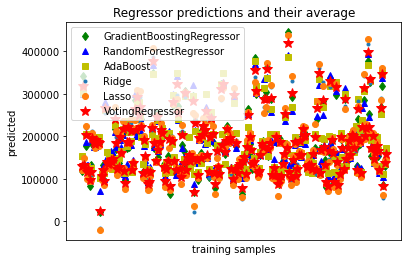

CPU times: user 7.3 s, sys: 121 ms, total: 7.42 s
Wall time: 5.98 s


In [51]:
%%time
# Train classifiers
gradboost = GradientBoostingRegressor(learning_rate=.1,
                                      max_depth=3,
                                      n_estimators=500)
randomfor = RandomForestRegressor(min_samples_leaf=1,
                                  min_samples_split=2,
                                  max_depth=None,
                                  n_estimators=400)
adaboost = AdaBoostRegressor(learning_rate=2,
                             n_estimators=250)
ridge = Ridge(fit_intercept=True, alpha=9.011018251665037)
lasso = Lasso(fit_intercept=True, alpha=28.6606761694825)

#--------------------------------------------------------------------------------------------------
# Fitting
gradboost.fit(X_train, y_train)
randomfor.fit(X_train, y_train)
adaboost.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

list_models = [('gradboost', gradboost),
               ('randomfor', randomfor), 
               ('adaboost', adaboost),
               ('ridge', ridge),
               ('lasso', lasso)]

ereg = Pipeline(steps=[("scaler", StandardScaler()),
                         ("mdl", VotingRegressor(estimators=list_models))])

ereg.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
# Predictions
pred1 = gradboost.predict(X_test)
pred2 = randomfor.predict(X_test)
pred3 = adaboost.predict(X_test)
pred4 = ridge.predict(X_test)
pred5 = lasso.predict(X_test)
pred6 = ereg.predict(X_test)

plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="AdaBoost")
plt.plot(pred4, ".", label="Ridge")
plt.plot(pred5, "o", label="Lasso")
plt.plot(pred6, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()